In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

### Loading the Images data as batches to tensorflow dataset

In [3]:
path=r"C:\Users\K P\Desktop\pythonprojectdeep\Datasets\PlantVillage"
dataset = tf.keras.preprocessing.image_dataset_from_directory(
            path,
            shuffle = True,
            image_size = (IMAGE_SIZE,IMAGE_SIZE),
            batch_size = BATCH_SIZE
)

Found 16011 files belonging to 10 classes.


## Displaying class names

In [4]:
#alpha numerical order is used by default class_names=None case
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [5]:
class_dict = {}
count  = 0
for names in class_names:
    class_dict[names] = count
    count = count + 1
class_dict


{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

##### Displaying a batch of data. It has 32 images, with each image a size of 256 by 256 and 3 is RGB channels.

In [6]:
for image_batch, label_batch in dataset.take(1):#.take(elements) method picking up the elements
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[4 2 8 7 4 7 7 5 4 7 0 7 9 9 9 0 6 2 0 2 3 0 7 5 9 4 5 5 4 7 6 1]


### Showing the first image in the batch of the numpy array is between 0 to 255

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[ 92.  82.  81.]
  [148. 138. 137.]
  [132. 122. 121.]
  ...
  [159. 150. 153.]
  [162. 153. 156.]
  [163. 154. 157.]]

 [[106.  96.  95.]
  [146. 136. 135.]
  [133. 123. 122.]
  ...
  [161. 152. 155.]
  [163. 154. 157.]
  [164. 155. 158.]]

 [[133. 123. 122.]
  [144. 134. 133.]
  [130. 120. 119.]
  ...
  [156. 147. 150.]
  [157. 148. 151.]
  [157. 148. 151.]]

 ...

 [[140. 132. 130.]
  [141. 133. 131.]
  [142. 134. 132.]
  ...
  [160. 154. 156.]
  [161. 155. 157.]
  [161. 155. 157.]]

 [[145. 137. 135.]
  [142. 134. 132.]
  [139. 131. 129.]
  ...
  [160. 154. 156.]
  [160. 154. 156.]
  [160. 154. 156.]]

 [[146. 138. 136.]
  [142. 134. 132.]
  [138. 130. 128.]
  ...
  [161. 155. 157.]
  [162. 156. 158.]
  [163. 157. 159.]]]


### The shape of the first image 

In [8]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


### Visualising 12(mentioning 12 imagaes) images from the batch of 32 images with their class names

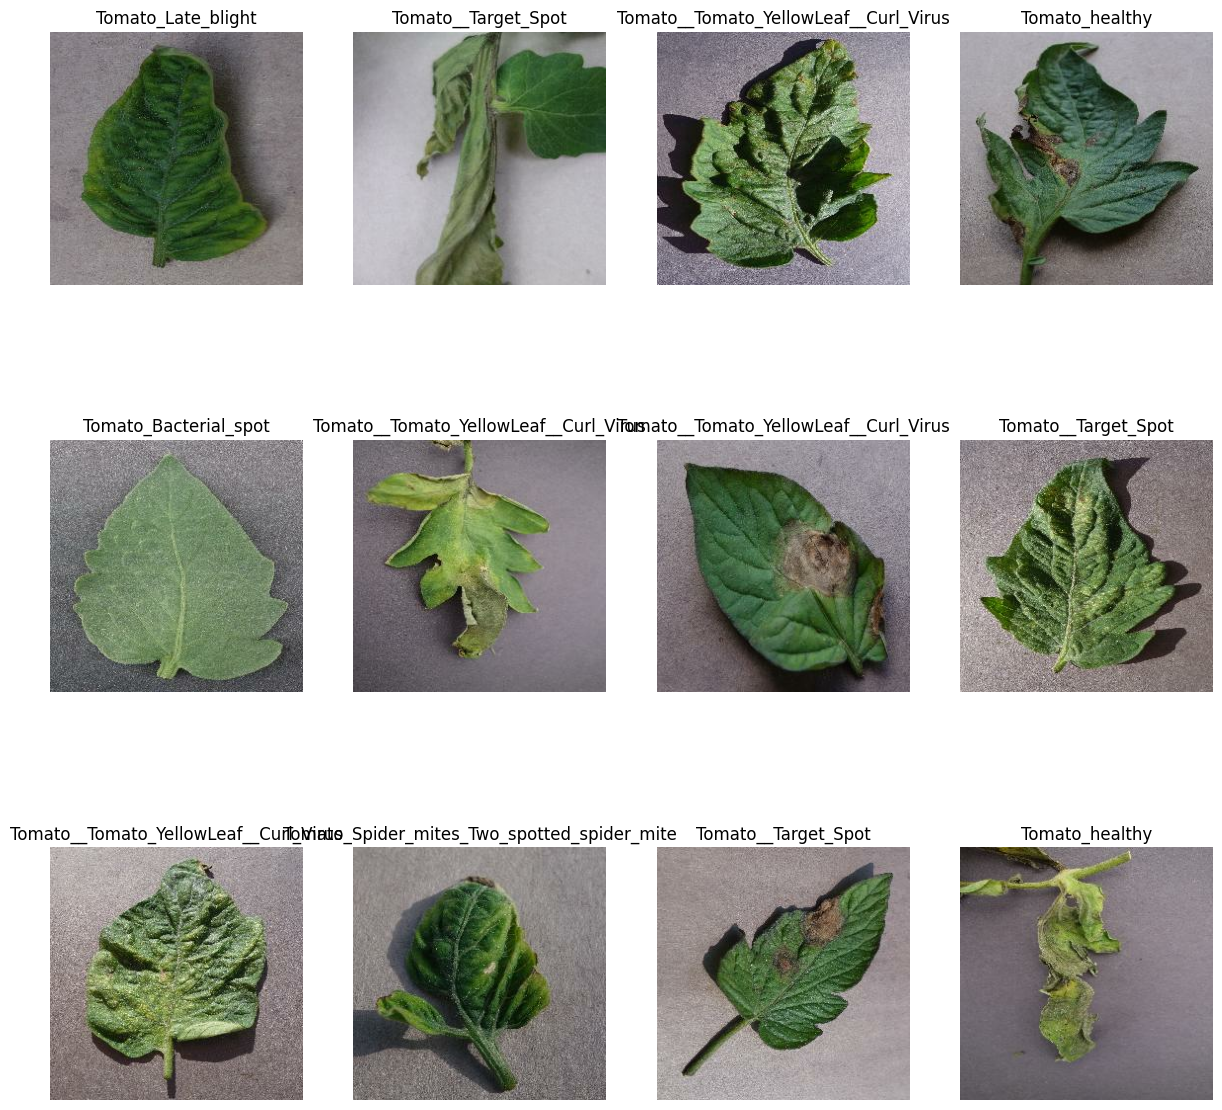

In [9]:
plt.figure(figsize=(15,15))
for image_batch,label_image in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)#subplot(nrows,ncols,index)
        plt.title(class_names[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))#(0 to 2^8-1)A UINT8 is an 8-bit unsigned integer (range: 0 through 255 decimal).
        plt.axis("off")#TO hide the axis.The axis('off') method resolves one of the problems more succinctly than separately changing each axis and border. It still leaves the white space around 



In [10]:
len(dataset)

501

## Splitting the dataset for training,validation and testing

### Length of the dataset is 501. From this 80% of the data will be used for training, 10% of the remaining data will be used for validation and the final 10 % of the data will be used for testing the model.

In [11]:
train_size=0.8
len(dataset)*train_size

400.8

In [12]:
train_ds = dataset.take(400)
len(train_ds)

400

In [13]:
test_ds = dataset.skip(400)
len(test_ds)

101

In [14]:
val_size = 0.1
len(dataset)*val_size

50.1

In [15]:
val_ds = test_ds.take(50)
len(val_ds)

50

In [16]:
test_ds = test_ds.skip(50)
len(test_ds)

51

### get_dataset_partition() is a function that shuffles the dataset and splits the dataset into training, validation and testing the model.

In [17]:
def get_dataset_partition(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size =1000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds1 = ds.take(train_size)
    val_ds1 = ds.skip(train_size).take(val_size)
    test_ds1 = ds.skip(train_size).skip(val_size)
    
    return train_ds1, val_ds1, test_ds1

In [18]:
train_ds1, val_ds1, test_ds1=get_dataset_partition(dataset)

### Cache, Shuffle and Prefetch the dataset 

cache() function here reads the image from the disk and stores in the memory. The next iteration will reuse the images cached during the cache transformation.

prefetch() function is used to decouple the time when data is produced from the time when data is consumed. The transformation uses a background thread and an internal buffer to prefetch elements from the input dataset ahead of the time they are requested.

AUTOTUNE, which will prompt the tf. data runtime to tune the value dynamically at runtime.

In [19]:
train_ds = train_ds1.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds1.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds1.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

### Scaling the image

In [20]:
from tensorflow.keras import layers
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

### Data Augmentation

In [21]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

### Applying Data Augmentation to train dataset

In [22]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

### Model Building using CNN

#### Using a CNN coupled with a Softmax activation in the output layer. Also added resizing, normalization and Data Augmentation as the initial layers.

#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
layers.Conv2D(filters,kernel_size, activation, input_shape),
we are applying input_shape for firstlayer only because


In [23]:
from tensorflow.keras import models,layers
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])

model.build(input_shape = input_shape)

In [24]:
model.summary()# for readIng model purpose

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

## Compiling the Model

### Using adam Optimizer,SparseCategoricalCrossentropy for losses and accuracy as a metric
Adam Deep Learning Optimizer

This optimization algorithm is a further extension of stochastic gradient descent to update network weights during training. Unlike maintaining a single learning rate through training in SGD, Adam optimizer updates the learning rate for each network weight individually.
To summarize, Adam definitely converges rapidly to a “sharp minima” whereas SGD is computationally heavy, converges to a “flat minima” but performs well on the test data.


### What is from_logits in Tensorflow?
The from_logits=True attribute inform the loss function that the output values generated by the model are not normalized, a.k.a. logits. In other words, the softmax function has not been applied on them to produce a probability distribution.29-Apr-2020

In [23]:
model.compile(
        optimizer = 'adam',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
        metrics = ['accuracy']
)


#### verbose: 0 for no logging to stdout, 1 for progress bar logging, 2 for one log line per epoch.

In [26]:
EPOCHS=20
history = model.fit(
        train_ds,
        epochs = EPOCHS,
        batch_size = BATCH_SIZE,
        verbose = 1,
        validation_data = val_ds

)

Epoch 1/20
400/400 [==============================] - 842s 2s/step - loss: 1.6362 - accuracy: 0.4240 - val_loss: 1.4839 - val_accuracy: 0.5412
Epoch 2/20
400/400 [==============================] - 763s 2s/step - loss: 1.0546 - accuracy: 0.6392 - val_loss: 0.8988 - val_accuracy: 0.6981
Epoch 3/20
400/400 [==============================] - 735s 2s/step - loss: 0.7808 - accuracy: 0.7289 - val_loss: 0.6748 - val_accuracy: 0.7613
Epoch 4/20
400/400 [==============================] - 733s 2s/step - loss: 0.5934 - accuracy: 0.7939 - val_loss: 0.6369 - val_accuracy: 0.7925
Epoch 5/20
400/400 [==============================] - 743s 2s/step - loss: 0.4420 - accuracy: 0.8457 - val_loss: 0.6677 - val_accuracy: 0.7781
Epoch 6/20
400/400 [==============================] - 1059s 3s/step - loss: 0.3628 - accuracy: 0.8716 - val_loss: 0.8844 - val_accuracy: 0.7356
Epoch 7/20
400/400 [==============================] - 718s 2s/step - loss: 0.3380 - accuracy: 0.8820 - val_loss: 0.6934 - val_accuracy: 0.781

In [27]:
scores = model.evaluate(test_ds)

51/51 [==============================] - 63s 351ms/step - loss: 0.2880 - accuracy: 0.9088


In [28]:
scores

[0.2879570722579956, 0.9087523221969604]

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plotting the accuracy and loss for both training and validation

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

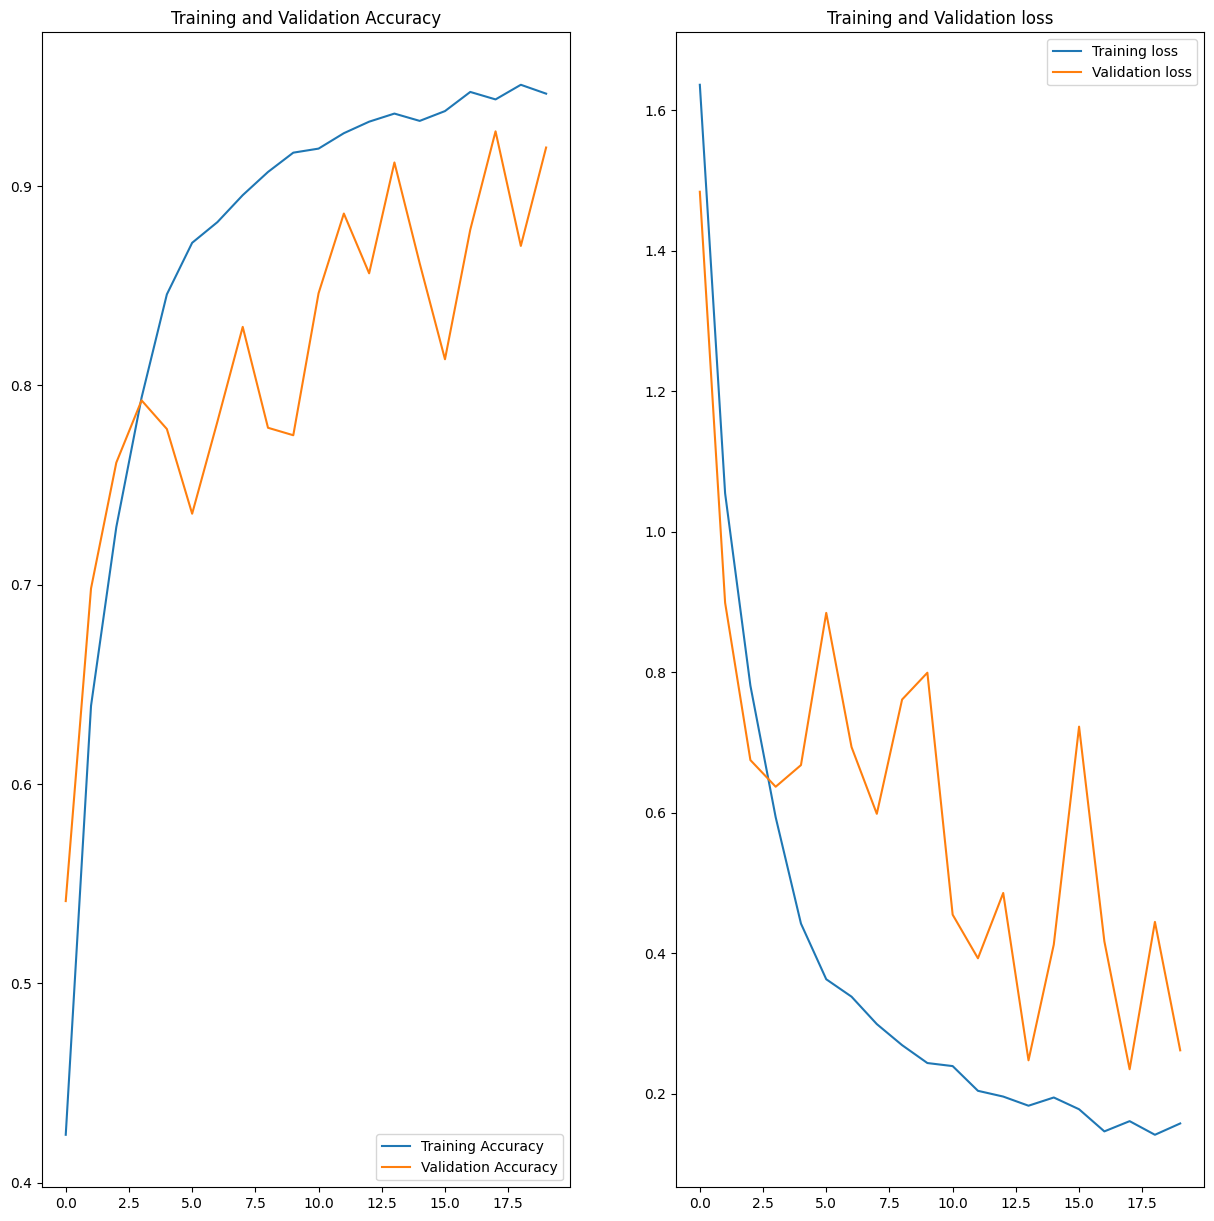

In [31]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label= 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = 'Training loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation loss')
plt.legend(loc = 'upper right')#create an area on the graph
plt.title('Training and Validation loss')
plt.show()

### train acc increases there is a val acc increases 

### train loss decreases there is a decrease in val loss

In [3]:
model.save('saved_model_cnn.h5')

NameError: name 'model' is not defined

In [ ]:
model.save('saved_model_cnn.h5')

In [4]:
scores=model.evaluate(test_ds)

NameError: name 'model' is not defined

In [23]:
import numpy as np
import tensorflow as tf
reloaded_model = tf.keras.models.load_model('saved_model_cnn.h5')

In [24]:
reloaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [25]:
scores=reloaded_model.evaluate(test_ds)

51/51 [==============================] - 82s 375ms/step - loss: 0.2348 - accuracy: 0.9193


In [26]:
scores

[0.2347930371761322, 0.9193047881126404]

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
reloaded_model= tf.keras.models.load_model('saved_model_cnn.h5')

[[[[232. 250. 250.]
   [231. 251. 252.]
   [240. 255. 255.]
   ...
   [ 32.  30.  43.]
   [ 26.  21.  43.]
   [ 19.  14.  36.]]

  [[226. 244. 246.]
   [225. 244. 248.]
   [227. 247. 254.]
   ...
   [ 35.  33.  46.]
   [ 29.  24.  46.]
   [ 22.  17.  39.]]

  [[226. 244. 246.]
   [225. 244. 248.]
   [227. 247. 254.]
   ...
   [ 35.  33.  46.]
   [ 29.  24.  46.]
   [ 22.  17.  39.]]

  ...

  [[188. 150. 175.]
   [174. 136. 161.]
   [160. 122. 147.]
   ...
   [105. 143.  70.]
   [106. 143.  66.]
   [106. 143.  66.]]

  [[188. 150. 175.]
   [174. 136. 161.]
   [160. 122. 147.]
   ...
   [105. 143.  70.]
   [106. 143.  66.]
   [106. 143.  66.]]

  [[177. 139. 164.]
   [170. 132. 157.]
   [165. 125. 151.]
   ...
   [103. 143.  70.]
   [103. 144.  66.]
   [103. 144.  66.]]]]
Predicted label :  Tomato_Septoria_leaf_spot
99.79


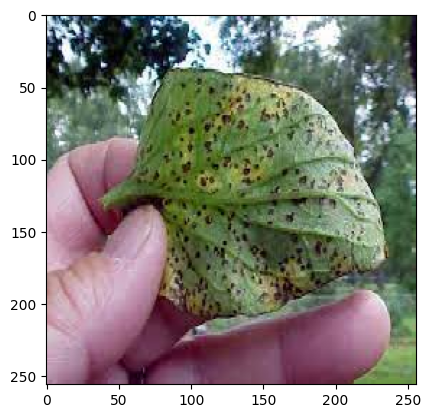

In [26]:
image_path=r"C:\Users\K P\Desktop\pythonprojectdeep\Datasets\test images\tomato bacterial spot.jpg"

test_image=image.load_img(image_path,target_size=(256,256))

plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image=np.vstack([test_image])
prediction = reloaded_model.predict(test_image,batch_size=32)
print("Predicted label : ", class_names[np.argmax(prediction[0])])
confidence = round(100 * (np.max(prediction[0])), 2)
print(confidence)






In [1]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    print(images_batch[0])
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("Actual label : ", class_names[first_label])
    plt.imshow(first_image)
    print(first_label)
    batch_prediction = reloaded_model.predict(images_batch)
    print("Predicted label : ", class_names[np.argmax(batch_prediction[0])])
    confidence = round(100 * (np.max(batch_prediction[0])), 2)
    print(np.argmax(batch_prediction[0]))
    print(confidence)

NameError: name 'test_ds' is not defined

In [11]:
import tensorflow as tf
import matplotlib as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import cv2
reloaded_model=load_model('saved_model.h5')
img=cv2.imread(r"C:\Users\K P\Desktop\pythonprojectdeep\Datasets\test images\tomato bacterial spot.jpg")

In [154]:
x

array([[[232., 250., 250.],
        [231., 251., 252.],
        [240., 255., 255.],
        ...,
        [ 32.,  30.,  43.],
        [ 26.,  21.,  43.],
        [ 19.,  14.,  36.]],

       [[226., 244., 246.],
        [225., 244., 248.],
        [227., 247., 254.],
        ...,
        [ 35.,  33.,  46.],
        [ 29.,  24.,  46.],
        [ 22.,  17.,  39.]],

       [[226., 244., 246.],
        [225., 244., 248.],
        [227., 247., 254.],
        ...,
        [ 35.,  33.,  46.],
        [ 29.,  24.,  46.],
        [ 22.,  17.,  39.]],

       ...,

       [[188., 150., 175.],
        [174., 136., 161.],
        [160., 122., 147.],
        ...,
        [105., 143.,  70.],
        [106., 143.,  66.],
        [106., 143.,  66.]],

       [[188., 150., 175.],
        [174., 136., 161.],
        [160., 122., 147.],
        ...,
        [105., 143.,  70.],
        [106., 143.,  66.],
        [106., 143.,  66.]],

       [[177., 139., 164.],
        [170., 132., 157.],
        [165., 1

In [136]:
x.shape

(256, 256, 3)

In [137]:
x=x/255

In [138]:
x

array([[[0.9098039 , 0.98039216, 0.98039216],
        [0.90588236, 0.9843137 , 0.9882353 ],
        [0.9411765 , 1.        , 1.        ],
        ...,
        [0.1254902 , 0.11764706, 0.16862746],
        [0.10196079, 0.08235294, 0.16862746],
        [0.07450981, 0.05490196, 0.14117648]],

       [[0.8862745 , 0.95686275, 0.9647059 ],
        [0.88235295, 0.95686275, 0.972549  ],
        [0.8901961 , 0.96862745, 0.99607843],
        ...,
        [0.13725491, 0.12941177, 0.18039216],
        [0.11372549, 0.09411765, 0.18039216],
        [0.08627451, 0.06666667, 0.15294118]],

       [[0.8862745 , 0.95686275, 0.9647059 ],
        [0.88235295, 0.95686275, 0.972549  ],
        [0.8901961 , 0.96862745, 0.99607843],
        ...,
        [0.13725491, 0.12941177, 0.18039216],
        [0.11372549, 0.09411765, 0.18039216],
        [0.08627451, 0.06666667, 0.15294118]],

       ...,

       [[0.7372549 , 0.5882353 , 0.6862745 ],
        [0.68235296, 0.53333336, 0.6313726 ],
        [0.627451  , 0